# Homework 02

The goal for this homework will be to become more skilled at building visual summaries of data. 
This is an important part of exploratory data analysis, as a graph can both summarize and give details that may be too long to describe textually. 

<div class="callout note">

<h2> Problem one </h2>

The column titled "target" identifies patients who were diagnosed with (value 1) or without (value 0) heart disease.  
Lets use visuals to explore patient attributes that may help identify patients with (or without) heart disease. 

**Task** 
Build visuals to explore differences among patients with or without heart disease for the following variables in the ```heart disease``` dataframe: (1) age, (2) sex, (3) trestbps, (4) chol, (5) restecg. 
You are free to select the visual that you think best describes this relationship. 

</div>

In [1]:
import pandas as pd 

heart_disease = pd.read_csv("heart.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<div class="callout note">

<h2> Problem two </h2>

H5 bird flu is widespread in wild birds worldwide and is causing outbreaks in poultry and U.S. dairy cows with several recent human cases in U.S. dairy and poultry workers.

While the current public health risk is low, CDC is watching the situation carefully and working with states to monitor people with animal exposures.

CDC is using its flu surveillance systems to monitor for H5 bird flu activity in people.

More information can be found here = [H5](https://www.cdc.gov/bird-flu/h5-monitoring/index.html)

The below code imports from the internet the number of monthly cases of H5 in humans for each country in the world from 1997 to present.
We will use this dataset to explore the number of cases in the United States. 

</div>

In [2]:
import pandas as pd
import requests

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/h5n1-flu-reported-cases.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/h5n1-flu-reported-cases.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

print(df)

       Entity      Code         Day  avian_cases_month
0      Africa       NaN  1997-01-01                  0
1      Africa       NaN  1997-02-01                  0
2      Africa       NaN  1997-03-01                  0
3      Africa       NaN  1997-04-01                  0
4      Africa       NaN  1997-05-01                  0
...       ...       ...         ...                ...
11099   World  OWID_WRL  2025-07-01                  4
11100   World  OWID_WRL  2025-08-01                  0
11101   World  OWID_WRL  2025-09-01                  2
11102   World  OWID_WRL  2025-10-01                  1
11103   World  OWID_WRL  2025-11-01                  1

[11104 rows x 4 columns]


<div class="callout note">

<h2> Problem two asks </h2>

(a) Subset the dataframe ```df``` to H5 cases in the United states on or after "2022-01-01".
You'll need to use ```loc```. 
Call this subsetted dataframe ```us```.

(b) Draw a barplot using seaborn such that the horizontal axis describes months and the vertical axis the number of H5 cases. 
Make sure to label the horizontal and vertical axes. 

(c)The xtick labels are cluttered, making it hard to tell which months we are presenting to the reader. 
Seaborn doesn't make it clear, right away, how it plotted this data.
Luckily, seaborn uses as its foundation matplotlib. 

(d) Many of the attributes of an axis can be extarcted by appending a **get**, an underscore, and then the attribute. 
For example, if we want to see how the xticks and xtick labels were created for the above plot we can write (see below)
Set the xticks such that the first xtick is drawn, then the third, fifth, and so on. 
Use the keyword ```rotation``` to set the xticklabels such that the are rotated 45 degrees. 

</div>

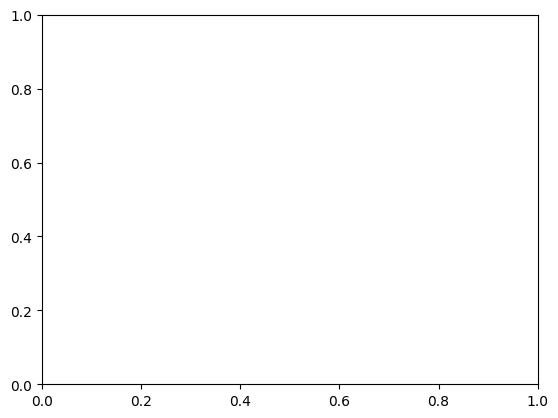

In [4]:
# Example of using get
fig, ax     = plt.subplots()
xticks      = ax.get_xticks()
xticklabels = ax.get_xticklabels()

<div class="callout note">

<h2> Problem three </h2>

(a) Intuitively, the "most correlated" two variables $X$ and $Y$ could be is if their values are equal.
That is, if $\mathcal{D} = ( (x_{1},x_{1}),(x_{2},x_{2}), \cdots, (x_{n},x_{n}) )$. 
Please show the value of the correlation coefficient equals under this condition.

(b) It is also possible that the two variables $X$ $Y$ can be perfectly correlated but opposite of one another. 
In otherwords, whenever we observe the value $x$ we observe the value $-x$.
Show what the correlation coefficient would equal under this condition. 

In [ ]:
fig,ax = plt.subplots()
ax.scatter(heart_disease["age"], heart_disease["chol"])

ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")

plt.show()

**Task**: Use the ```assign``` function in pandas to create two new columns:
1. z_age which will be each patient age minus the mean age and divided by the standard deviation.
2. z_chol which will be each patient cholesterol level minus the mean cholesterol level and divided by the standard deviation.